In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
tweets_data_path = 'twitter_data.txt'

In [31]:
tweets_file = open(tweets_data_path, "r")

In [32]:
for line in tweets_file:
    tweet = line
    tweets_data.append(tweet)

In [33]:
tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [46]:
tweets = pd.DataFrame(tweets_data)

In [85]:
tweets['country'].value_counts()

<map object at 0x7fb09a1b00d0>    705
Name: country, dtype: int64

<AxesSubplot:title={'center':'Top 5 languages'}, xlabel='Languages', ylabel='Number of tweets'>

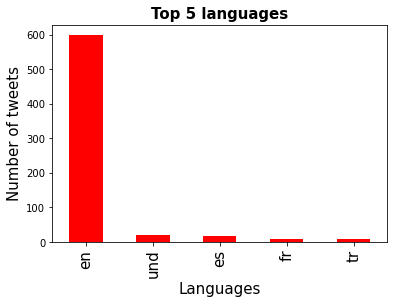

In [49]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

In [ ]:
$ curl --request GET 
 --url 'https://api.twitter.com/1.1/search/tweets.json?q=nasa&result_type=popular' 
 --header 'authorization: OAuth oauth_consumer_key="consumer-key-for-app", 
 oauth_nonce="generated-nonce", oauth_signature="generated-signature", 
 oauth_signature_method="HMAC-SHA1", oauth_timestamp="generated-timestamp", 
 oauth_token="access-token-for-authed-user", oauth_version="1.0"'
$ twurl /1.1/search/tweets.json?q=nasa&result_type=popular
Example

In [ ]:
https://api.twitter.com/1.1/search/tweets.json?q=vegan%20OR%20veganism&src=typed_query

In [1]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler, Stream, API

keywords = ["vegan", "veganism"]

access_token = "1921879345-ZWORqpOrCvBNlYarCaJucUrwYK5kDGP9eckgMHI"
access_token_secret = "ucVJX0dkXywIDsRNBa2VfQlY7oZCLk0zlrVSVbOPA7vDv"
consumer_key = "vkkBaYfbVIx6PFvYT3uFH3tXh"
consumer_secret = "7h7owpn6rrzhHqxNQHjcYn3etCew8CqanLCQxkhSyELMvBDX6S"


auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = API(auth)
search_results = api.search(q="vegan", count=100)

In [12]:
from pipeline import NLPPipe, tweet_clean1

from helper_functions import txt_to_df

In [11]:
search_list = list(search_results)

In [13]:
txt_to_df(list_data=search_list)

TypeError: txt_to_df() got an unexpected keyword argument 'list_data'

In [19]:
import tweepy

In [29]:
tweets = tweepy.Cursor(api.search, q='vegan', count=100, tweet_mode='extended').items(100)

In [37]:
saveFile = open('twitter_data2.txt', 'a')
for tweet in tweets:
    print(' ')
    saveFile.write(tweet.text)
    saveFile.write('\n')

saveFile.close()

In [38]:
search_results = []
for status in tweepy.Cursor(api.search, q='vegan', tweet_mode='extended').items(5000):
    search_results.append(status._json)

with open('search_results.json', 'w') as f:
    json.dump(search_results, f)

TweepError: Twitter error response: status code = 429

In [75]:
for tweet in search_results:
    saveFile = open('twitter_data2.txt', 'a')
    saveFile.write(json.dumps(tweet))
    saveFile.write('\n')
    saveFile.write('\n')
saveFile.close()

In [74]:
type(search_results[0])

dict

In [54]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import PorterStemmer

from pipeline import NLPPipe, tweet_clean1

from helper_functions import txt_to_df

import pickle
%load_ext autoreload
%autoreload 2

In [76]:
tweets = txt_to_df(txt_path='twitter_data2.txt')
# Let's take all of our tweets and turn it into a DataFrame

KeyError: "['text', 'extended_tweet'] not in index"

In [104]:
def txt_to_df(txt_path):
    """
    Powerhouse function to take raw scraped twitter data
    into a DataFrame of just the tweet texts

    Args:
        txt_path: The path for the saved file containing
            the tweet data in json format

    Returns:
        A DataFrame containing just the raw tweet texts
    """
    path = txt_path
    tweets_file = open(path, "r")
    tweets_data = []
    for line in tweets_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
    tweet = pd.DataFrame(tweets_data)
    tweet = tweet[tweet["lang"] == "en"]
    try:
        tweet = tweet[["text", "truncated", "extended_tweet", "retweeted_status"]]
        tweet["long_text"] = tweet.apply(ext_tweets, axis=1)
        tweet["long_text"] = tweet.apply(ext_rt, axis=1)
        return tweet[["long_text"]]
    except:
        tweet[['long_text']] = tweet[['full_text']]
        return tweet[['long_text']]

In [105]:
tweets = txt_to_df(txt_path='twitter_data2.txt')

# I NEED TO UPDATE THE FUNCTION!!!!!

In [106]:
tweets

,long_text
1,RT @ForksOverKnives: Fall colors shine through...
2,"Risotto, daal, pasta bake with herbs, a pumpki..."
6,@queennjemima You say that now but there’s a l...
7,Good read https://t.co/NLKwgnZNGe
8,"RT @Fiorella_im: BREAKING according to judge, ..."
...,...
2668,"Running with Don with some stops for drinking,..."
2670,"RT @Sonic1938: ""To all suffering. To the slaug..."
2673,@SixbyNico the #vegan #home #delivery is inspi...
2674,RT @Cat_Kapow: Remembering the magnificent hor...


In [78]:
path = 'twitter_data2.txt'
tweets_file = open(path, "r")
tweets_data = []
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [94]:
tweets_data[5]['full_text']

'RT @kanae_hiratsuka: @eharahiroyuki @asahi →③日本の食文化も再生させるため菜食主義者用にカルシウムや鉄分が豊富なひじきを使って「さ」は省いた「ま・ご・わ・や・さ・し・い」栄養素を一食で摂取できる無添加無化調国産夕食料理も作りました！💞…'

In [68]:
path = 'twitter_data2.txt'
tweets_file = open(path, "r")

In [72]:
for line in tweets_file:
    tweet = json.loads(line)

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)